In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [ ]:
!pip install prophet

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

: 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/tu49jckf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/_qgaiac8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14583', 'data', 'file=/tmp/tmpaktgah6y/tu49jckf.json', 'init=/tmp/tmpaktgah6y/_qgaiac8.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modeletwhissg/prophet_model-20240823023228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

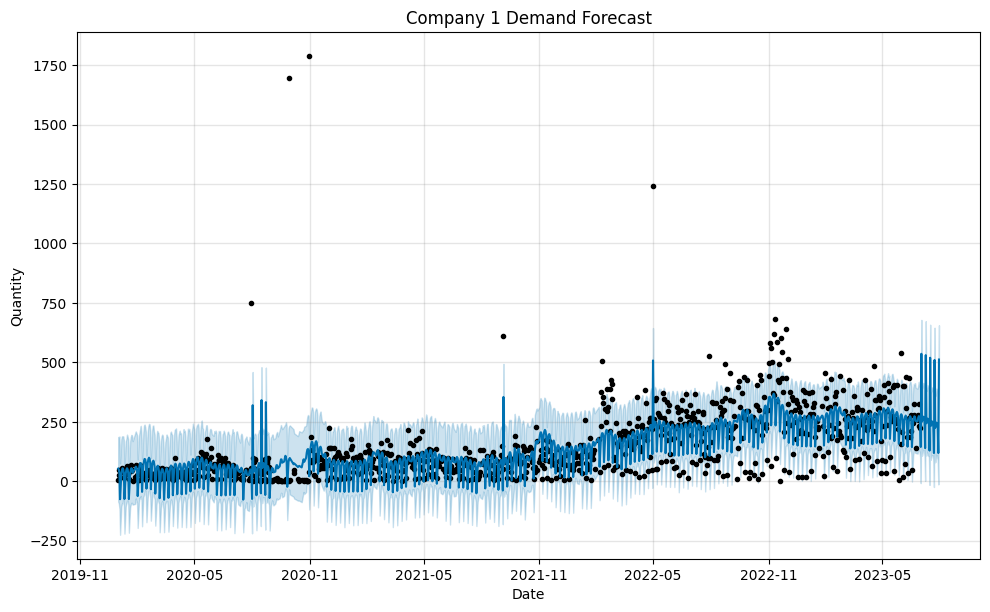

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/kfldh71t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/e6dpc7g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12299', 'data', 'file=/tmp/tmpaktgah6y/kfldh71t.json', 'init=/tmp/tmpaktgah6y/e6dpc7g8.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modeljpl9qox8/prophet_model-20240823023229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

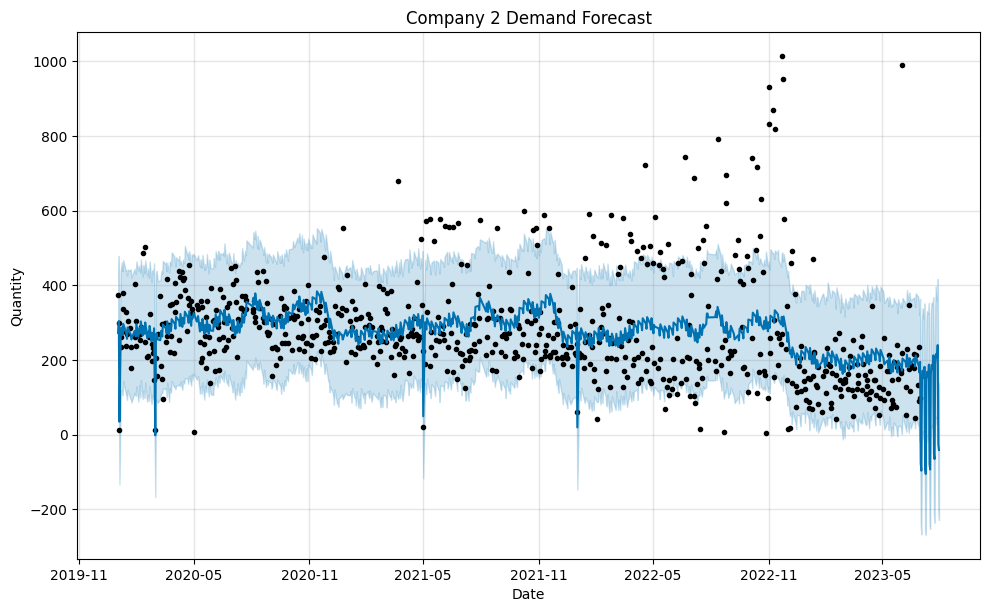

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/l2r_0c_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/cxe7yg05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97809', 'data', 'file=/tmp/tmpaktgah6y/l2r_0c_v.json', 'init=/tmp/tmpaktgah6y/cxe7yg05.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_model966bjz3l/prophet_model-20240823023230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

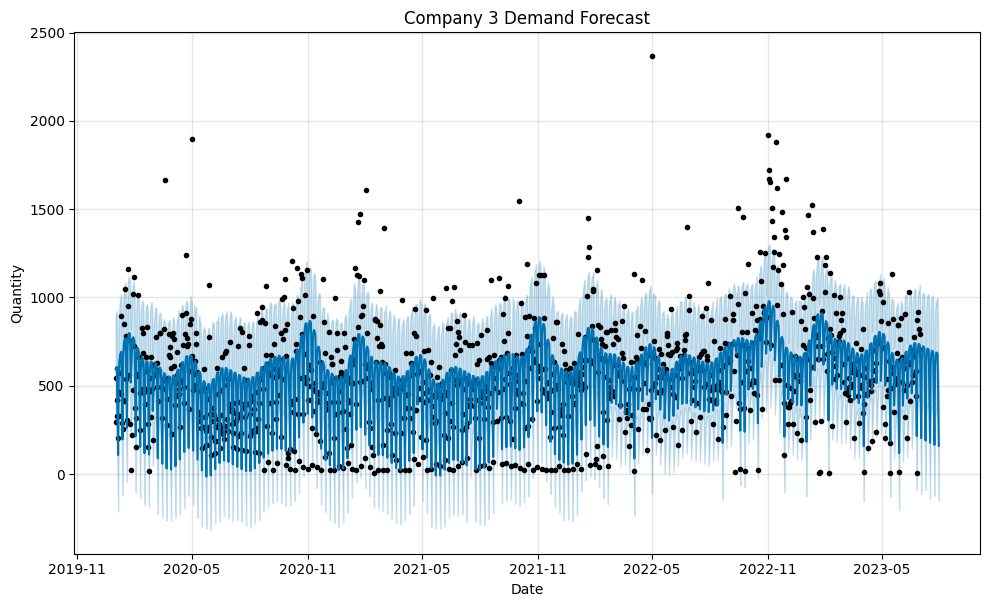

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/x6g6aii_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/jdlxpsm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86482', 'data', 'file=/tmp/tmpaktgah6y/x6g6aii_.json', 'init=/tmp/tmpaktgah6y/jdlxpsm1.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modelznr22ei9/prophet_model-20240823023231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

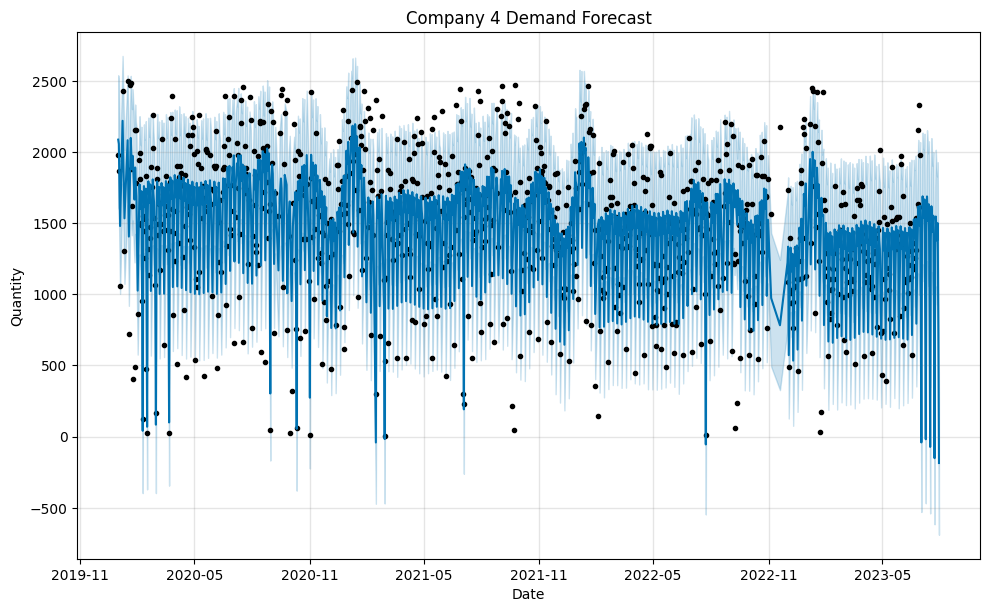

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/jibwkfez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/8q78b_vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70987', 'data', 'file=/tmp/tmpaktgah6y/jibwkfez.json', 'init=/tmp/tmpaktgah6y/8q78b_vq.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_model5qrxi5xl/prophet_model-20240823023233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

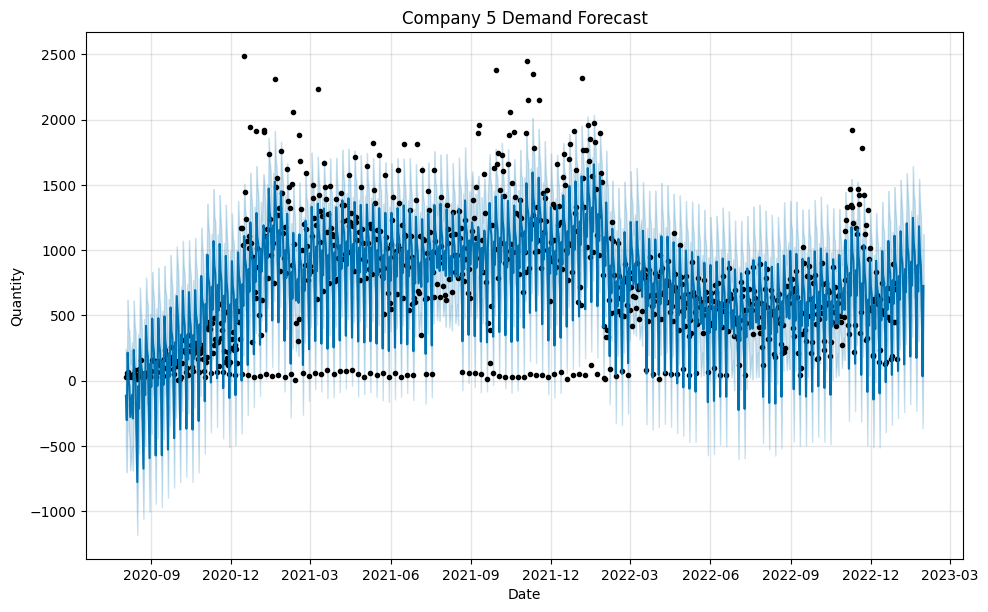

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/qty.csv', encoding='euc-kr')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y%m%d')

# Group data by 'Code' and 'Date'
grouped_data = data.groupby(['Code', 'Date']).sum().reset_index()

# Order data
grouped_data = grouped_data.sort_values(by=['Code', 'Date'])

# Remove outliers in 'Quantity' column
Q1 = grouped_data['Quantity'].quantile(0.25)
Q3 = grouped_data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
grouped_data = grouped_data[(grouped_data['Quantity'] >= (Q1 - 1.5 * IQR)) & (grouped_data['Quantity'] <= (Q3 + 1.5 * IQR))]

# Data preprocessing for Prophet (Prophet requires column names to be 'ds' for date and 'y' for quantity)
# Divide the data by 'Code' to predict each code (company) separately
forecast_results = {}

for code in grouped_data['Code'].unique():
    # Extract data for the code
    code_data = grouped_data[grouped_data['Code'] == code]

    # Modify column names to fit the input format of Prophet
    prophet_data = code_data[['Date', 'Quantity']].rename(columns={'Date': 'ds', 'Quantity': 'y'})

    # Initialize and train the model
    model = Prophet(daily_seasonality=True)
    model.fit(prophet_data)

    # Create a dataframe for future data (30 days prediction)
    future = model.make_future_dataframe(periods=30)

    # Predict the future data
    forecast = model.predict(future)

    # Save the forecast results
    forecast_results[code] = forecast

    # VIsualize the forecast results
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Company {code} Demand Forecast')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.show()  # Add plt.show() to display the plot

In [ ]:
# Next Step

!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
# Use Z-Score to remove outliers
from scipy.stats import zscore

grouped_data['zscore'] = zscore(grouped_data['Quantity'])
grouped_data_clean = grouped_data[(grouped_data['zscore'].abs() <= 3)] # Only keep Z-Score absolute value 3 or less

grouped_data_clean = grouped_data_clean.drop('zscore', axis=1)  # Remove the 'zscore' column

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 1 - Mean Squared Error: 16574.70506882591


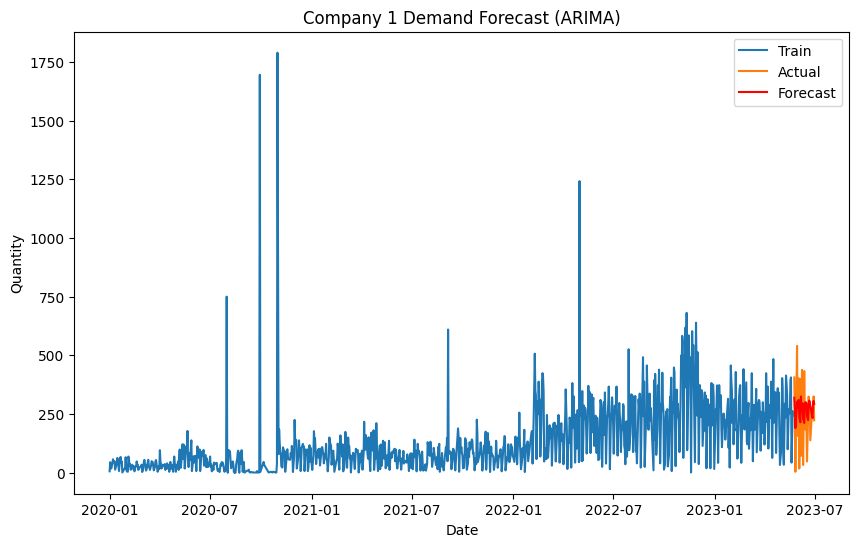

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 2 - Mean Squared Error: 28281.41174866602


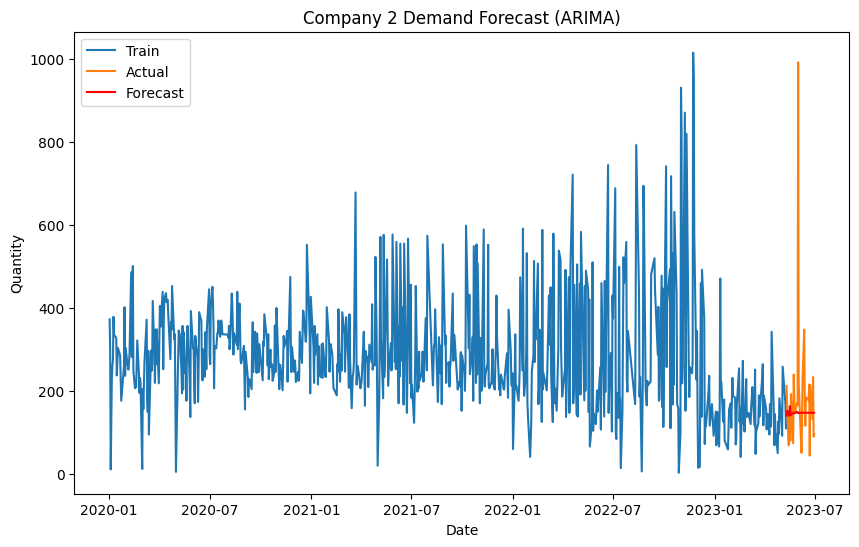

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 3 - Mean Squared Error: 49708.56403533205


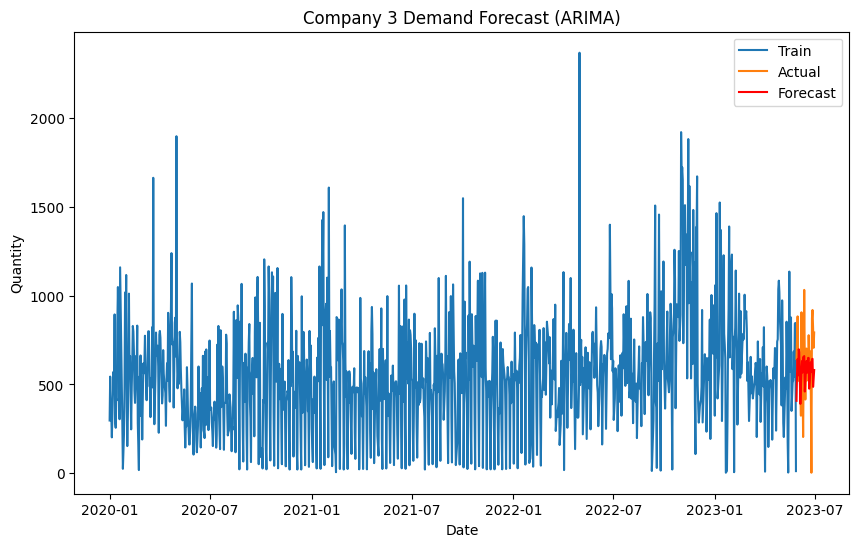

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 4 - Mean Squared Error: 181395.11133340045


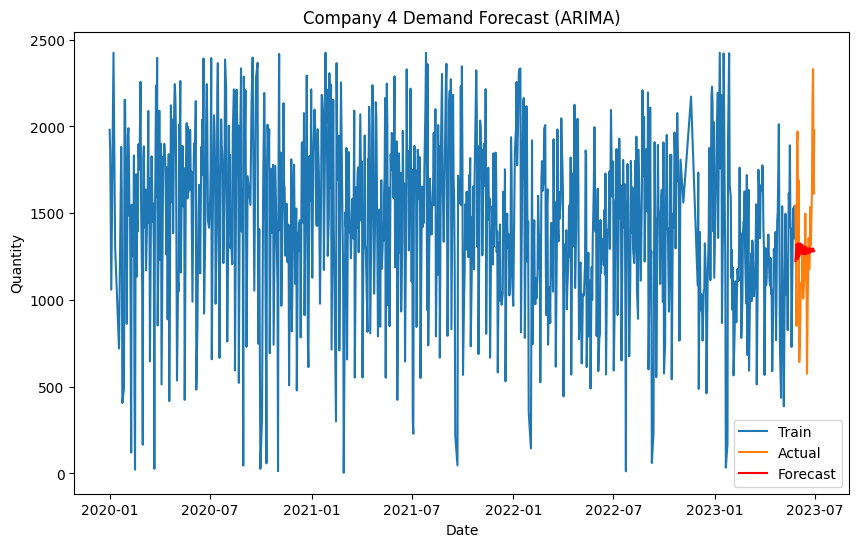

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 5 - Mean Squared Error: 150624.9642799872


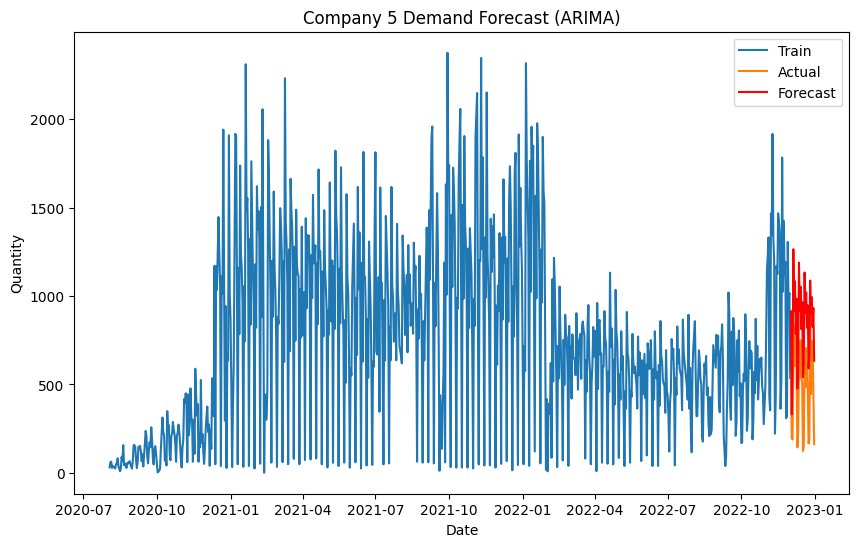

In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Use pmadrma to train and predict the model
for code in grouped_data_clean['Code'].unique():
    code_data = grouped_data_clean[grouped_data_clean['Code'] == code]

    # Set the date as the index
    code_data.set_index('Date', inplace=True)

    # Separate the training data and test data (e.g., use the last 30 days as test data)
    train_data = code_data[:-30]
    test_data = code_data[-30:]

    # ARIMA model training
    model = auto_arima(train_data['Quantity'], seasonal=True, m=7)  # Consider weekly seasonality

    # Evaluate the model by predicting during the test data period
    forecast = model.predict(n_periods=30)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(test_data['Quantity'], forecast)
    print(f'Code {code} - Mean Squared Error: {mse}')

    # Visualize the actual and predicted demand
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Quantity'], label='Train')
    plt.plot(test_data.index, test_data['Quantity'], label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast', color='red')
    plt.title(f'Company {code} Demand Forecast (ARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 1 - Mean Squared Error: 18154.316397620783


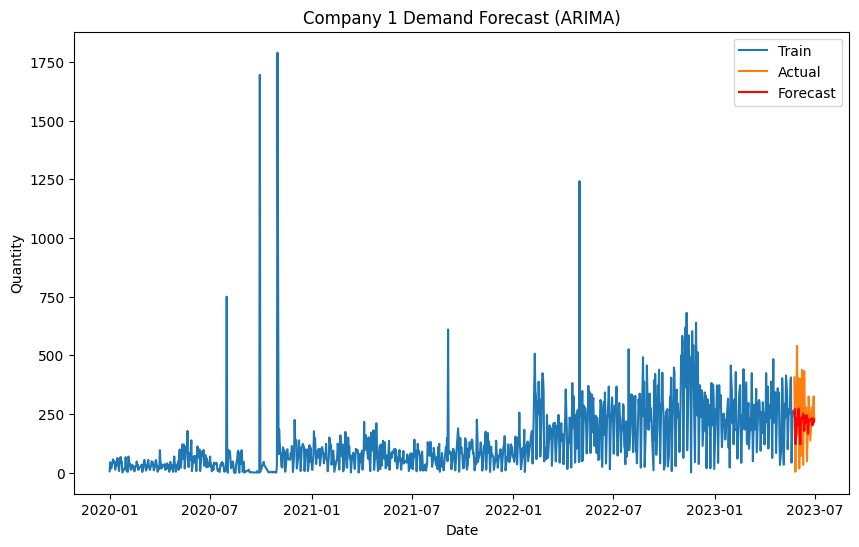

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 2 - Mean Squared Error: 28926.795418844315


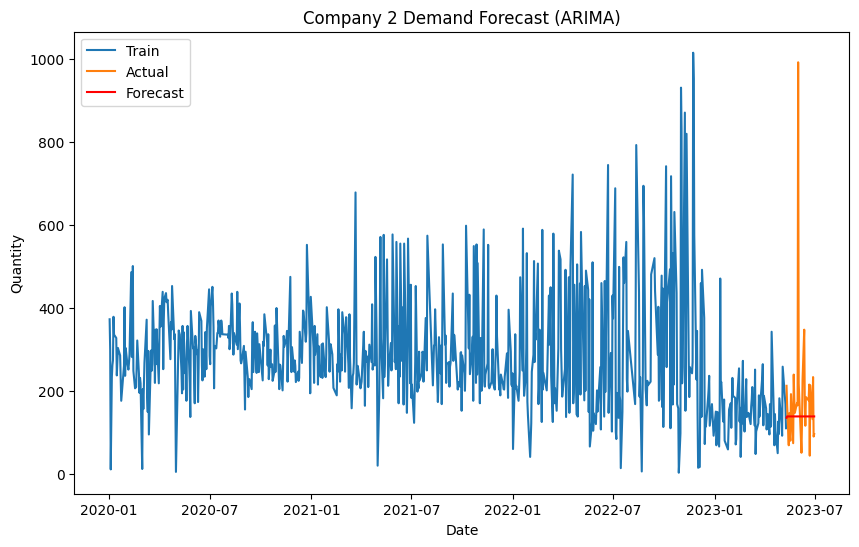

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 3 - Mean Squared Error: 113417.79799050739


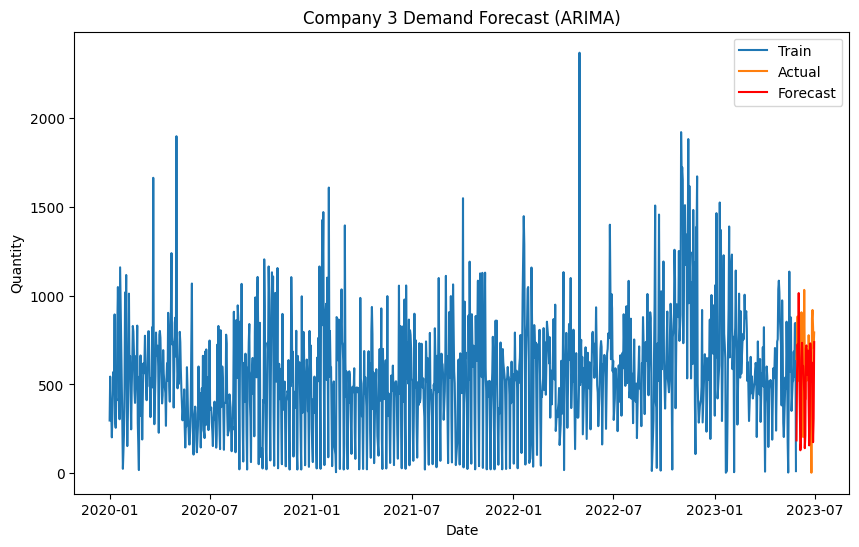

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 4 - Mean Squared Error: 164191.11206450957


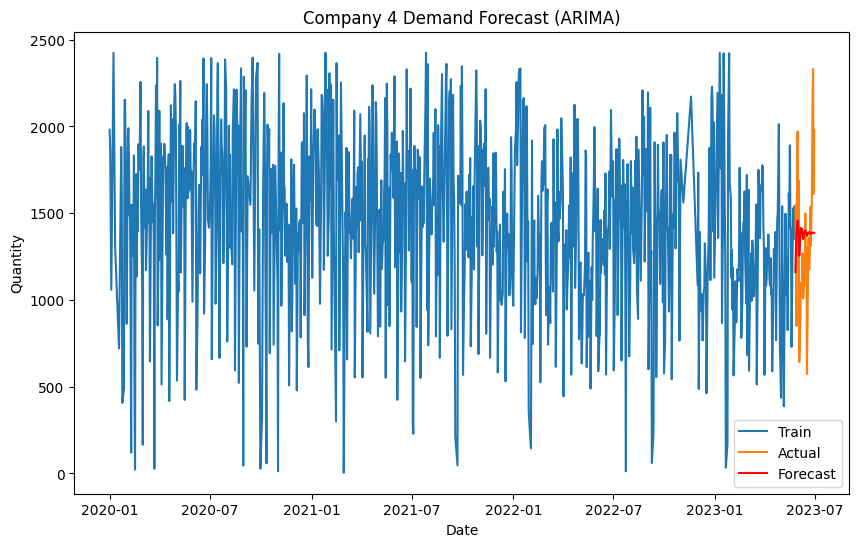

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Code 5 - Mean Squared Error: 146822.89041695994


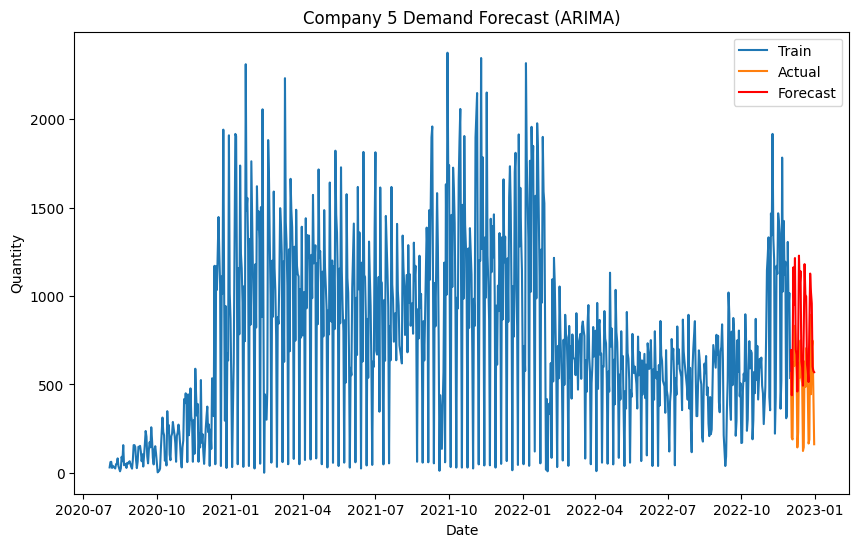

In [ ]:
# Above is the code without preprocessing, so the result is not good.
# Below is the code with preprocessing.

from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
# Data Scaling (Log Transformation or Min-Max Scaling)
grouped_data_clean['Quantity_log'] = np.log1p(grouped_data_clean['Quantity'])

# Use pmdarima to train and predict the model
for code in grouped_data_clean['Code'].unique():
    code_data = grouped_data_clean[grouped_data_clean['Code'] == code]

    # Set the date as the index
    code_data.set_index('Date', inplace=True)

    # Use the log-transformed data
    train_data = code_data[:-30]
    test_data = code_data[-30:]

    # Train the ARIMA model (considering seasonality)
    model = auto_arima(train_data['Quantity_log'], seasonal=True, m=12)  # Considering monthly seasonality

    # Perform prediction during the test data period
    forecast_log = model.predict(n_periods=30)

    # Reverse the log transformation to the original scale
    forecast = np.expm1(forecast_log)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(test_data['Quantity'], forecast)
    print(f'Code {code} - Mean Squared Error: {mse}')

    # Visualize the actual and predicted demand
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Quantity'], label='Train')
    plt.plot(test_data.index, test_data['Quantity'], label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast', color='red')
    plt.title(f'Company {code} Demand Forecast (ARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/d82at1w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/hup_9br_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30166', 'data', 'file=/tmp/tmpaktgah6y/d82at1w_.json', 'init=/tmp/tmpaktgah6y/hup_9br_.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modelcn5gdfpn/prophet_model-20240823034921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Code 1 - Mean Squared Error: 93724.25492388189


<Figure size 1000x600 with 0 Axes>

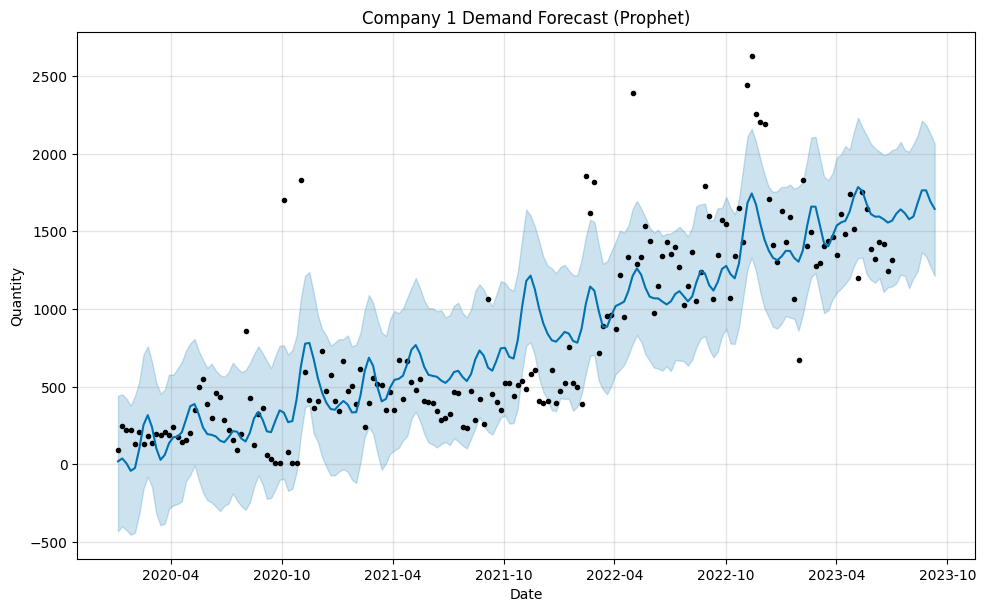

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/z7kq8hzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/54ypjqay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3376', 'data', 'file=/tmp/tmpaktgah6y/z7kq8hzu.json', 'init=/tmp/tmpaktgah6y/54ypjqay.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modelfudo7s50/prophet_model-20240823034922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Code 2 - Mean Squared Error: 169707.23569493773


<Figure size 1000x600 with 0 Axes>

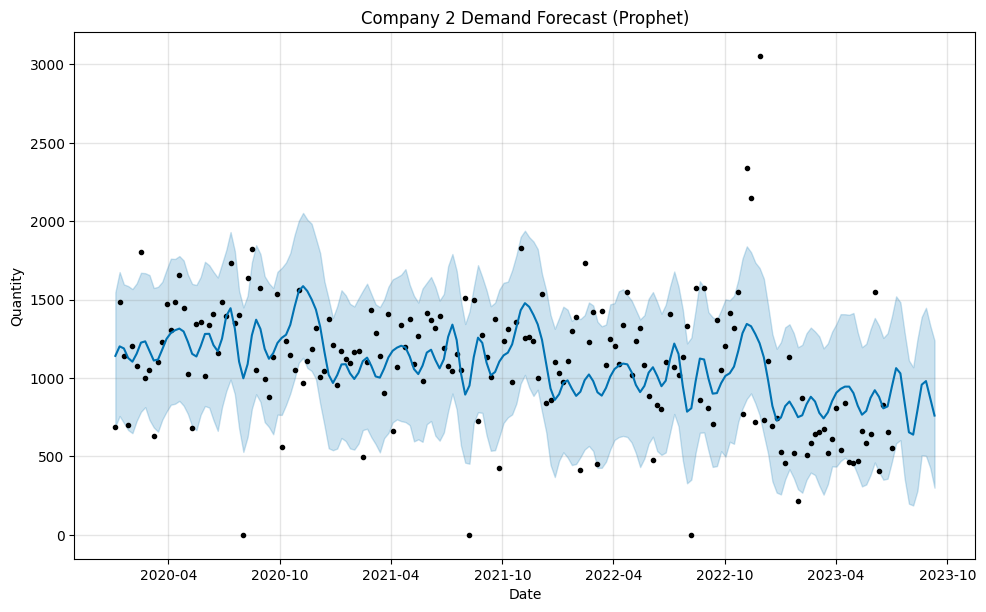

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/5vi8oe1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/fjw_0u0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82002', 'data', 'file=/tmp/tmpaktgah6y/5vi8oe1g.json', 'init=/tmp/tmpaktgah6y/fjw_0u0o.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modeljxso71vr/prophet_model-20240823034922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Code 3 - Mean Squared Error: 475075.2959809767


<Figure size 1000x600 with 0 Axes>

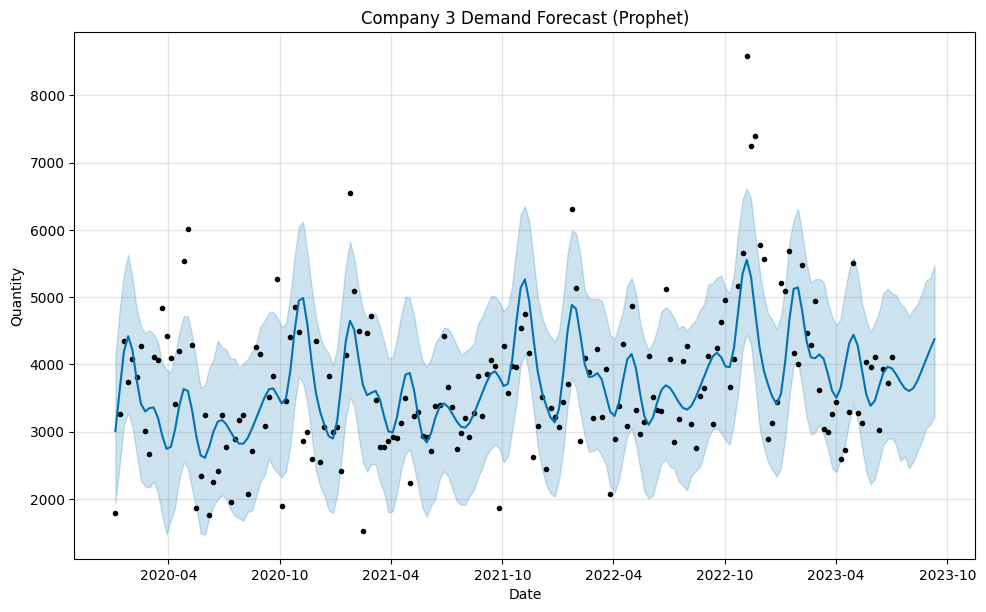

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/iv170dci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/lh_g7euh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58958', 'data', 'file=/tmp/tmpaktgah6y/iv170dci.json', 'init=/tmp/tmpaktgah6y/lh_g7euh.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_modelscd8clbk/prophet_model-20240823034924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Code 4 - Mean Squared Error: 2437505.7188023264


<Figure size 1000x600 with 0 Axes>

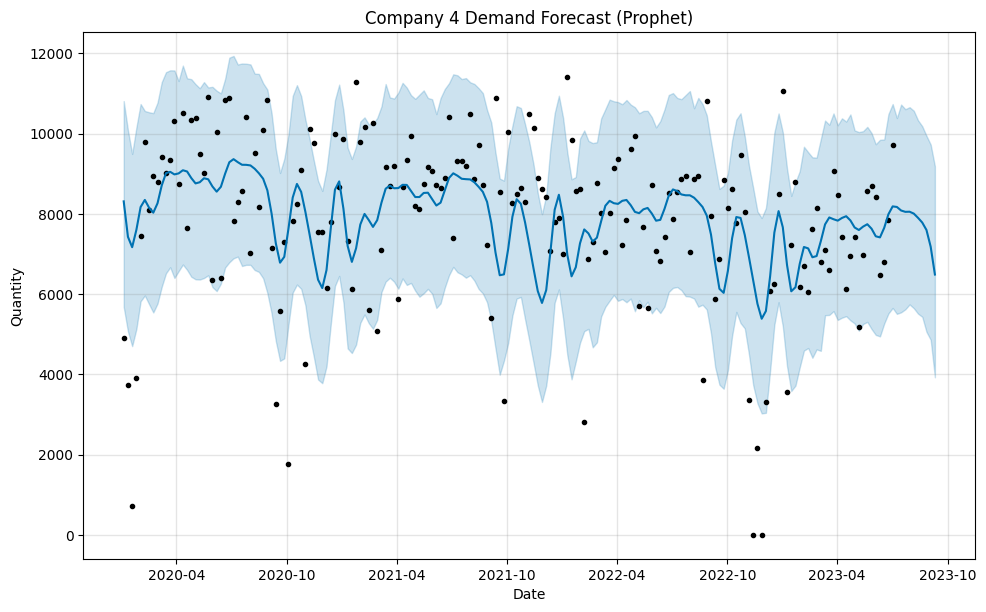

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/t70ugjek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaktgah6y/ss7kn7g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37676', 'data', 'file=/tmp/tmpaktgah6y/t70ugjek.json', 'init=/tmp/tmpaktgah6y/ss7kn7g8.json', 'output', 'file=/tmp/tmpaktgah6y/prophet_model50iob5th/prophet_model-20240823034924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Code 5 - Mean Squared Error: 1795335.8257512401


<Figure size 1000x600 with 0 Axes>

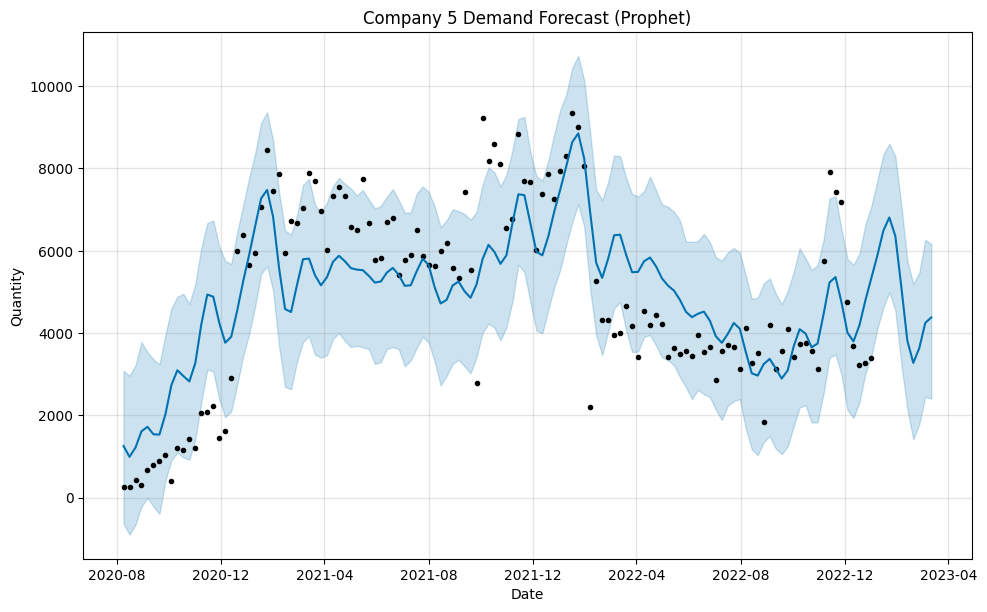

In [ ]:
# Resampling the data by week
grouped_data_clean.set_index('Date', inplace=True)

# # Group the data by code and resample the data by week
grouped_data_weekly = grouped_data_clean.groupby('Code').resample('W')['Quantity'].sum().reset_index()

# Predict weekly demand using Prophet
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

for code in grouped_data_weekly['Code'].unique():
    code_data = grouped_data_weekly[grouped_data_weekly['Code'] == code]

    # Modify the column names to fit the input format of Prophet
    prophet_data = code_data[['Date', 'Quantity']].rename(columns={'Date': 'ds', 'Quantity': 'y'})

    # Train the Prophet model
    model = Prophet(weekly_seasonality=True)
    model.fit(prophet_data)

    # Create a dataframe for future data (10 weeks prediction)
    future = model.make_future_dataframe(periods=10, freq='W')

    # Perform prediction
    forecast = model.predict(future)

    # Evaluation: Perform evaluation if actual data exists
    if len(forecast) > len(prophet_data):
        test_data = prophet_data[-10:]  # Use the last 10 weeks as test data
        forecast_values = forecast.tail(10)['yhat']
        mse = mean_squared_error(test_data['y'], forecast_values)
        print(f'Code {code} - Mean Squared Error: {mse}')

    # Visualize the forecast results
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Company {code} Demand Forecast (Prophet)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.show()